- Complexidade do modelo
- Efeito da validação
- Relevância dos dados


- coletar os dados
- escolher o modelo conveniente (ARX nessa aula)
- calcular o melhor modelo (qual a medida de desempenho usada?)


- persistência da informação
- analise preliminar dos dados
- informações a priori
- matriz de interação / interactor matrix


Transformada Z
$$
X(z)=\sum\limits_{n=-\inf}^{\inf}x(n)z^{-n}
$$

$$
y[n-k] => Y(z)z^{-k}
$$

- O residuo $e(t)$ tem média zero ~ $N(0,\sigma)$

In [1]:
import numpy as np
import batelada as bt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importa um arquivo com os dados de saída
file = "dryer.csv"
with open(file, "r") as f:
    data = np.loadtxt(f, delimiter=";")

In [3]:
print('Método dos mínimos quadrados em batelada')
u = data[:,0] # Como os dados são sequênciais, é gerado uma sequência de números
y = data[:,1] # Salva os dados de saídas
print(f'Número de pontos: {u.size}')

Método dos mínimos quadrados em batelada
Número de pontos: 1000


MSE 1: 0.01
MSE n: 0.04


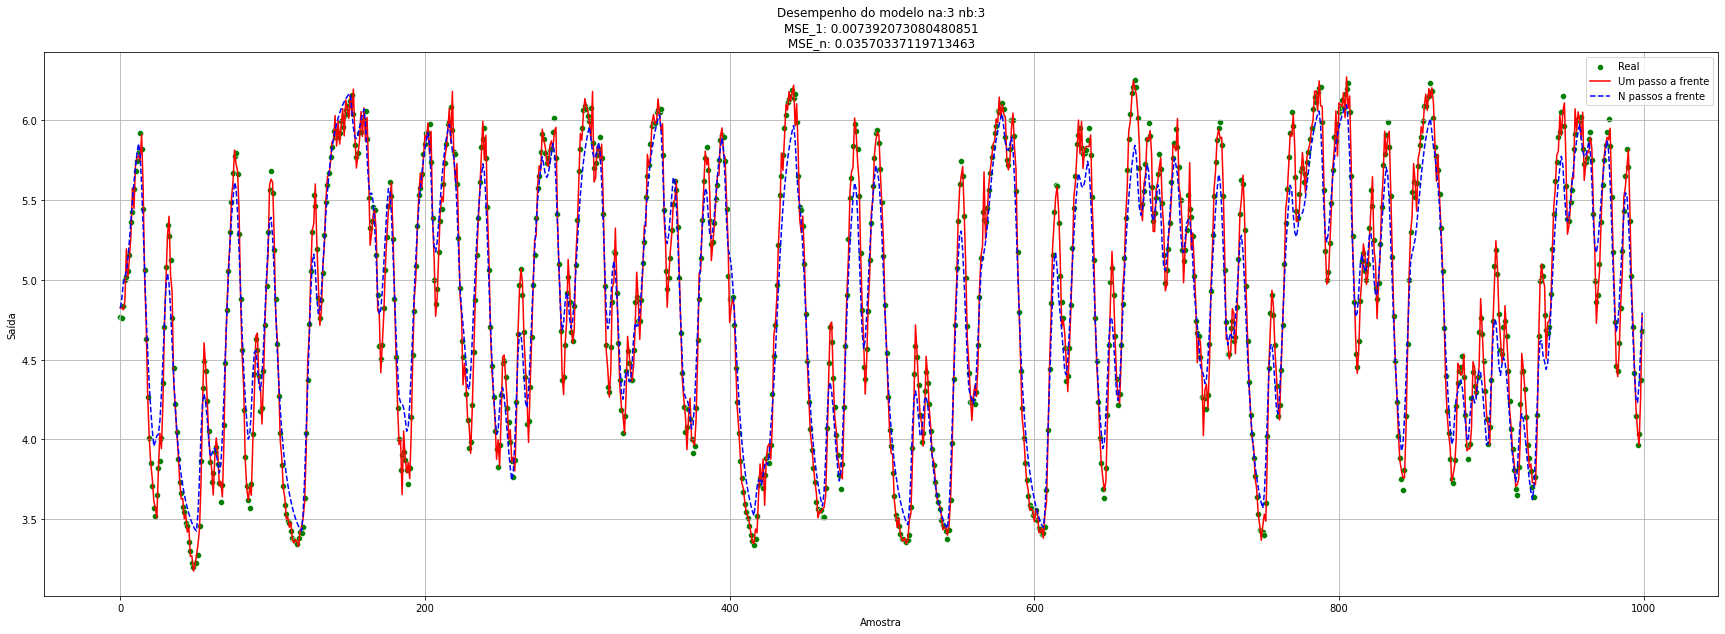

In [7]:
na, nb = 3, 3
delay = 0
yest_1, yest_n, theta = bt.gerar_dados(na, nb, u, y, delay)
deep = max(na, nb)
npts = u.size
#yest_n[yest_n > yest_1.max()*1.5] = yest_1.max()*1.5
#yest_n[yest_n < min(yest_1.min()*1.5,0)] = min(yest_1.min()*1.5,0)
# Mean Squared Error (MSE) – objetivo é um menor MSE
MSE_1 = np.sum((y-yest_1)**2)/(npts-deep)
MSE_n = np.sum((y-yest_n)**2)/(npts-deep)

print(f'MSE 1: {MSE_1:0.2f}')
print(f'MSE n: {MSE_n:0.2f}')
t = np.arange(y.size)

# Plota a figura
plt.figure(figsize = (30,10))
sns.scatterplot(x=t,y=y,color='green',markers='.',label='Pontos medidos')
#sns.barplot(x=t,y=np.abs(y-yest_1),color='purple')
sns.lineplot(x=t,y=yest_1,color='red',linestyle='-',label='Um passo a frente')
sns.lineplot(x=t,y=yest_n,color='blue',linestyle='--',label='N passos a frente')
plt.title(f'Desempenho do modelo na:{na} nb:{nb}\nMSE_1: {MSE_1}\nMSE_n: {MSE_n}')
plt.legend(labels=["Real","Um passo a frente","N passos a frente"])
plt.xlabel('Amostra')
plt.ylabel('Saída')
plt.grid()
plt.show()
plt.close()



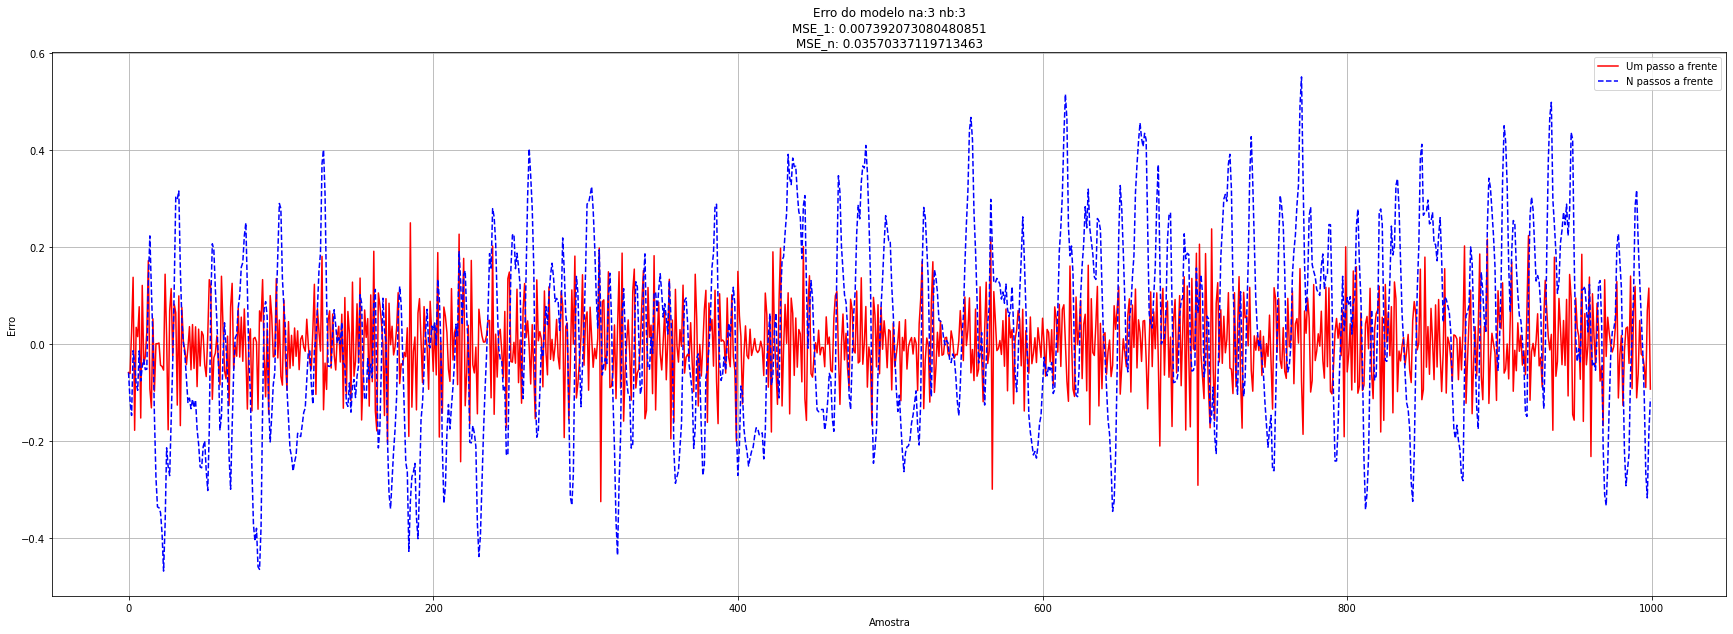

In [8]:
# Plota a figura
plt.figure(figsize = (30,10))
sns.lineplot(x=t,y=y-yest_1,color='red',linestyle='-',label='Um passo a frente')
sns.lineplot(x=t,y=y-yest_n,color='blue',linestyle='--',label='N passos a frente')
plt.title(f'Erro do modelo na:{na} nb:{nb}\nMSE_1: {MSE_1}\nMSE_n: {MSE_n}')
plt.legend(labels=["Um passo a frente","N passos a frente"])
plt.xlabel('Amostra')
plt.ylabel('Erro')
plt.grid()
plt.show()
plt.close()


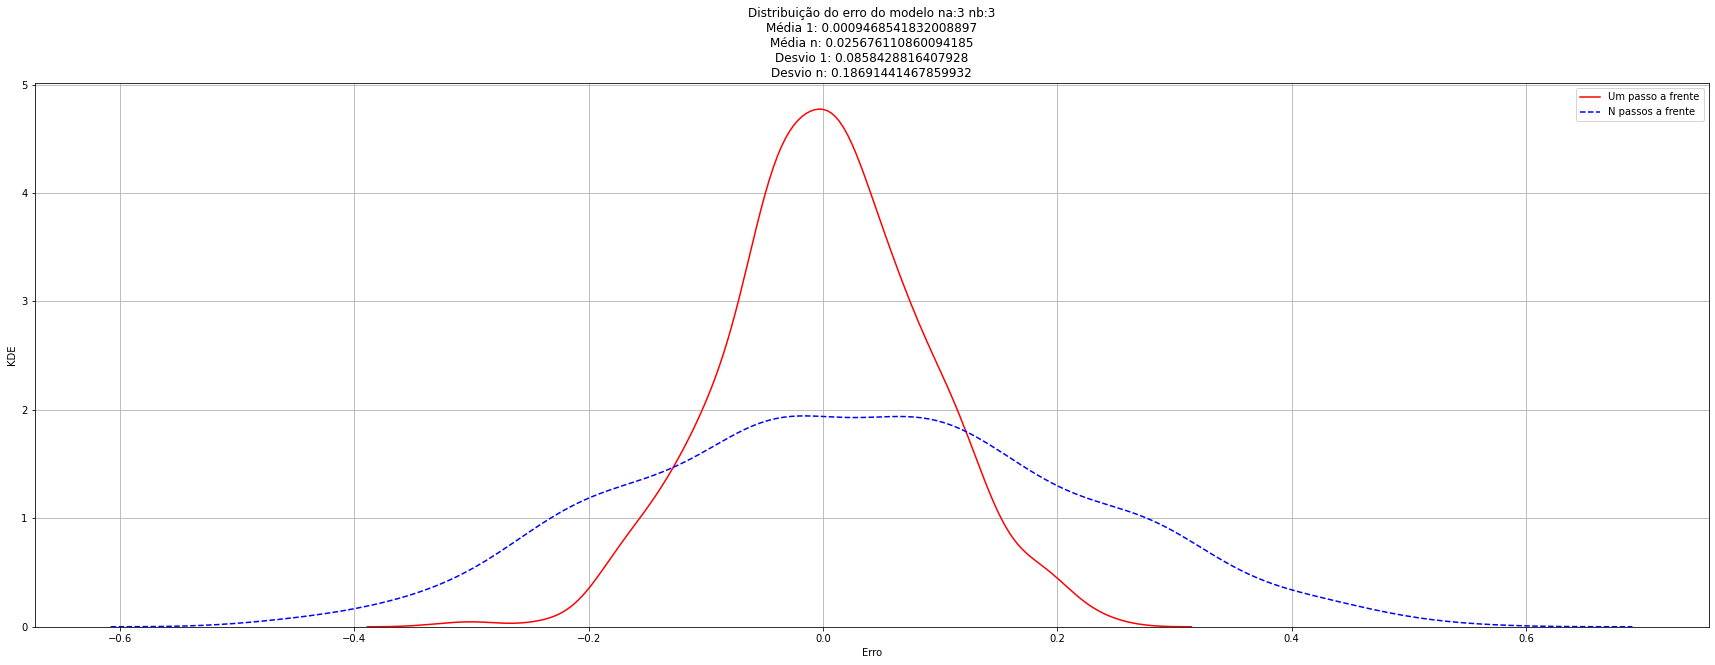

In [14]:
# Plota a figura
plt.figure(figsize = (30,10))
sns.kdeplot(x=y-yest_1,color='red',linestyle='-',label='Um passo a frente')
sns.kdeplot(x=y-yest_n,color='blue',linestyle='--',label='N passos a frente')
plt.title(f'''Distribuição do erro do modelo na:{na} nb:{nb}
Média 1: {(y-yest_1).mean()}\nMédia n: {(y-yest_n).mean()}
Desvio 1: {(y-yest_1).std()}\nDesvio n: {(y-yest_n).std()}''')
plt.legend(labels=["Um passo a frente","N passos a frente"])
plt.xlabel('Erro')
plt.ylabel('KDE')
plt.grid()
plt.show()
plt.close()


In [5]:
theta

array([-2.00150462e+00,  1.40332966e+00, -3.62175268e-01,  1.27401492e-04,
        2.08622833e-03,  3.63881312e-02])